References
https://learnopencv.com/shape-matching-using-hu-moments-c-python/

# Importing

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from google.colab.patches import cv2_imshow
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import math
from numpy import array
from google.colab import drive 

# Connecting to Google Drive

In [ ]:
# Connect to Google Drive
from google.colab import drive 
drive.mount('/content/gdrive/', force_remount=True)

# Check if path is valid
input_path = '/content/gdrive/My Drive/DATA 245 Group Collaboration/Group Project/Datasets/Dataset Final/'
if os.path.exists(input_path):
  print('Google Drive path to dataset is valid.')

Mounted at /content/gdrive/
Google Drive path to dataset is valid.


# Data Processing & Feature Extraction

In [ ]:
# Dataset is a 2D list of [features] and labels (0=good, 1=bad)
data = []

for label in ['good', 'bad']:
  
  # Get data from the corresponding good/bad subfolders
  #path = os.path.join(input_path, label)
  path = os.path.join(input_path, label + '_augmentation')

  for imgfilename in os.listdir(path):
    imgpath = os.path.join(path, imgfilename)
    star_img = cv2.imread(imgpath, 0)
    
    # Resize from 30x30 to 300x300
    star_img = cv2.resize(star_img, (300,300))

    # Denoise
    star_img_denoised = cv2.fastNlMeansDenoising(star_img, h=11, templateWindowSize=7, searchWindowSize=21)

    # Threshold. Adjust "135" as threshold level
    T, thresh = cv2.threshold(star_img_denoised, 135, 255,	cv2.THRESH_BINARY)
    
    # Obtain contours
    contours, hierarchy = cv2.findContours(thresh, 1, 2)
    cnt = contours[0]

    # Obtain moments & hu moments
    M = cv2.moments(cnt)
    huMoments = cv2.HuMoments(M)
    
    # Transform hu moments
    for i in range(0,7):
      huMoments[i] = -1 * math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i]))

    # Store 7 hu moments as features and label into dataset
    data.append([[i[0] for i in huMoments], ['good', 'bad'].index(label), imgfilename])
    

# Data Visualization

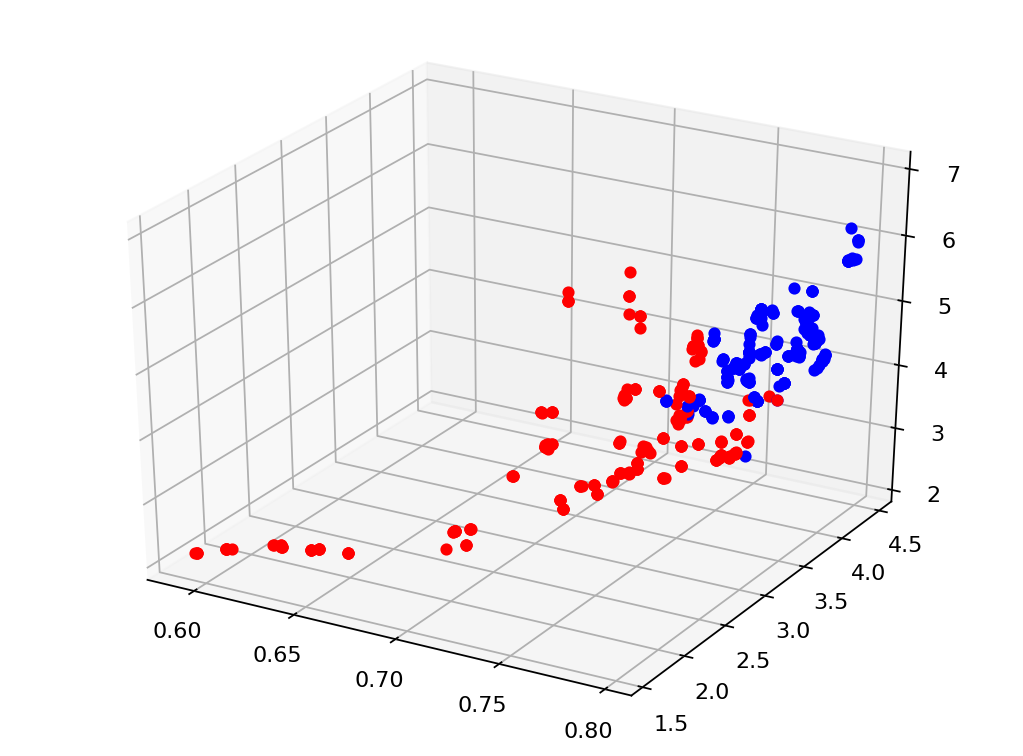

In [ ]:
# 3D plotting using the first 3 hu moments

figure(figsize=(8, 6), dpi=160)

ax = plt.axes(projection='3d')

for point in data:
  if point[1] == 0:
    color = 'blue'
  else:
    color = 'red'
  x = point[0][0]
  y = point[0][1]
  z = point[0][2]
  ax.scatter3D(*zip([x,y,z]), color=color)

# Build models and evaluate

In [ ]:
# Extract features and labels
features = []
labels = []
for feature, label, _ in data:
    features.append(feature)
    labels.append(label)

In [ ]:
# Split data into testing and training
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.2, random_state=5)

<class 'list'>


## SVM Kernel Parameter

In [ ]:
# Create and train linear model on training data
from sklearn.svm import SVC
SVM_linear = SVC(kernel='linear')
SVM_linear.fit(xtrain, ytrain)

SVC(kernel='linear')

In [ ]:
# Validate SVM linear model using test data

ypredict_linear = SVM_linear.predict(xtest)
accuracy_linear = SVM_linear.score(xtest, ytest)

print('SVM linear model accuracy: ', accuracy_linear)


SVM linear model accuracy:  0.8691588785046729


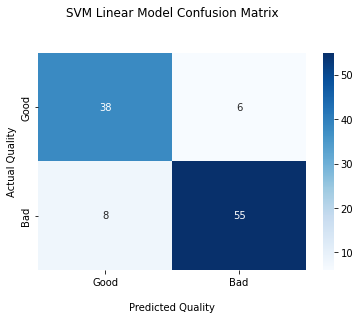

In [ ]:
# Get the confusion matrix
cf_matrix = confusion_matrix(ytest, ypredict_linear)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('SVM Linear Model Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Quality')
ax.set_ylabel('Actual Quality');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Good', 'Bad'])
ax.yaxis.set_ticklabels(['Good', 'Bad'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(classification_report(ytest, ypredict_linear))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        44
           1       0.90      0.87      0.89        63

    accuracy                           0.87       107
   macro avg       0.86      0.87      0.87       107
weighted avg       0.87      0.87      0.87       107



In [ ]:
# Create and train SVM polynomial kernel on training data
SVM_poly = SVC(C=1, kernel='poly', gamma='auto')
SVM_poly.fit(xtrain, ytrain)

SVC(C=1, gamma='auto', kernel='poly')

In [ ]:
# Validate SVM polynomial kernel using test data

ypredict_poly = SVM_poly.predict(xtest)
accuracy_poly = SVM_poly.score(xtest, ytest)

print('SVM polynomial kernel accuracy: ', accuracy_poly)

SVM polynomial kernel accuracy:  0.9252336448598131


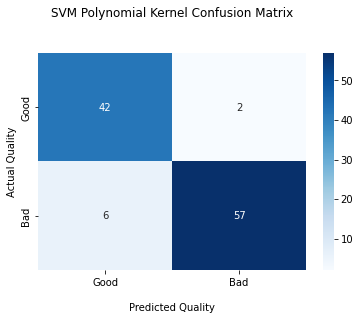

In [ ]:
# Get the confusion matrix
cf_matrix = confusion_matrix(ytest,ypredict_poly)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('SVM Polynomial Kernel Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Quality')
ax.set_ylabel('Actual Quality');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Good', 'Bad'])
ax.yaxis.set_ticklabels(['Good', 'Bad'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Validate polynomial kernel using test data

ypredict_poly = SVM_poly.predict(xtest)
accuracy = SVM_poly.score(xtest, ytest)

print('SVM polynomial kernel accuracy: ', accuracy)


SVM polynomial kernel accuracy:  0.9252336448598131


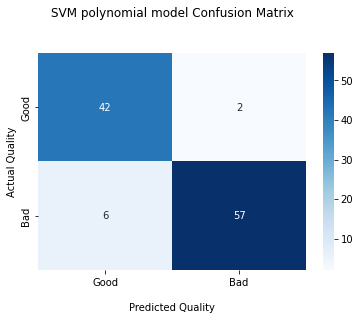

In [ ]:
# Get the SVM polynomial kernel confusion matrix
cf_matrix = confusion_matrix(ytest, ypredict_poly)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('SVM polynomial model Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Quality')
ax.set_ylabel('Actual Quality');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Good', 'Bad'])
ax.yaxis.set_ticklabels(['Good', 'Bad'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(classification_report(ytest, ypredict_poly))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       0.97      0.90      0.93        63

    accuracy                           0.93       107
   macro avg       0.92      0.93      0.92       107
weighted avg       0.93      0.93      0.93       107



In [ ]:
# Create and train SVM Gaussian Kernel on training data
SVM_Gaussian = SVC(kernel='rbf')
SVM_Gaussian.fit(xtrain, ytrain)

SVC()

In [ ]:
# Validate SVM Gaussian Kernel using test data

ypredict_Gaussian = SVM_Gaussian.predict(xtest)
accuracy = SVM_Gaussian.score(xtest, ytest)

print('SVM Gaussian kernel accuracy: ', accuracy)

SVM Gaussian kernel accuracy:  0.822429906542056


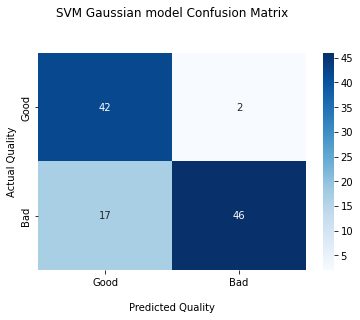

In [ ]:
# Get the SVM Gaussian kernel confusion matrix
cf_matrix = confusion_matrix(ytest, ypredict_Gaussian)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('SVM Gaussian model Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Quality')
ax.set_ylabel('Actual Quality');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Good', 'Bad'])
ax.yaxis.set_ticklabels(['Good', 'Bad'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(classification_report(ytest, ypredict_Gaussian))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82        44
           1       0.96      0.73      0.83        63

    accuracy                           0.82       107
   macro avg       0.84      0.84      0.82       107
weighted avg       0.86      0.82      0.82       107



## KNN

In [ ]:
KNN_model = KNeighborsClassifier(4)
KNN_model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Validate model using test data

ypredict = KNN_model.predict(xtest)
accuracy = KNN_model.score(xtest, ytest)

print('KNN model accuracy: ', accuracy)

KNN model accuracy:  0.897196261682243


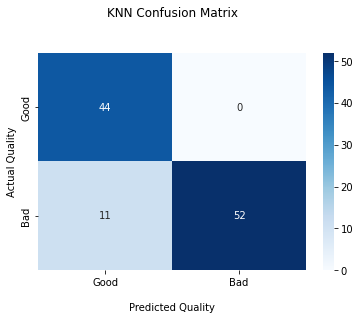

In [ ]:
# Get the confusion matrix
cf_matrix = confusion_matrix(ytest, ypredict)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('KNN Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Quality')
ax.set_ylabel('Actual Quality');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Good', 'Bad'])
ax.yaxis.set_ticklabels(['Good', 'Bad'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Random Forest

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
# Validate model using test data

ypredict = RF_model.predict(xtest)
accuracy = RF_model.score(xtest, ytest)

print('Random Forest model accuracy: ', accuracy)

Random Forest model accuracy:  0.9813084112149533


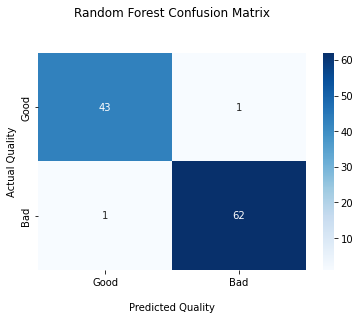

In [ ]:
# Get the confusion matrix
cf_matrix = confusion_matrix(ytest, ypredict)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Random Forest Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Quality')
ax.set_ylabel('Actual Quality');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Good', 'Bad'])
ax.yaxis.set_ticklabels(['Good', 'Bad'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
ypredict_poly = SVM_poly.predict(xtest)
ypredict_knn = KNN_model.predict(xtest)
ypredict_RF = RF_model.predict(xtest)

In [ ]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
ypredict_poly[0]

0

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, ypredict_poly, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(ytest, ypredict_knn, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(ytest, ypredict_RF, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(ytest, ypredict_poly)
auc_score2 = roc_auc_score(ytest, ypredict_knn) 
auc_score3 = roc_auc_score(ytest, ypredict_RF)
print(auc_score1, auc_score2,auc_score3)

0.9296536796536796 0.9126984126984127 0.9806998556998557


Text(0, 0.5, 'True Positive rate')

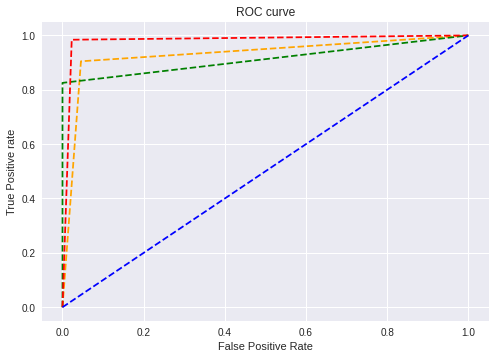

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM polynomial kernel')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

### Saving the models into pickle files



In [ ]:
# Save SVC model into pickle file
pkl_filename = os.path.join('/content/gdrive/My Drive/DATA 245 Group Collaboration/Group Project/Saved Models/', 'SVC_Model.pkl')
with open(pkl_filename, 'wb') as file:  
    pickle.dump(SVM_linear, file)

# Save KNN model into pickle file
pkl_filename = os.path.join('/content/gdrive/My Drive/DATA 245 Group Collaboration/Group Project/Saved Models/', 'KNN_Model.pkl')
with open(pkl_filename, 'wb') as file:  
    pickle.dump(KNN_model, file)

# Save KNN model into pickle file
pkl_filename = os.path.join('/content/gdrive/My Drive/DATA 245 Group Collaboration/Group Project/Saved Models/', 'RF_Model.pkl')
with open(pkl_filename, 'wb') as file:  
    pickle.dump(RF_model, file)